In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn .metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('../data/curated/predict_data.csv')

In [3]:
df = df.iloc[:, [1,4,5,6,7,8,9,10,11,12,13,14]]
dummies = pd.get_dummies(df.furnished, prefix = ['f'])
df = pd.concat([df, dummies],axis = 1)
del df['furnished']

# calculate population change each year
df['pop23-22'] = df['2023 no.'] - df['2022 no.']
df['pop24-23'] = df['2024 no.'] - df['2023 no.']
df['pop25-24'] = df['2025 no.'] - df['2024 no.']
df = df.drop(columns = ['2022 no.', '2023 no.', '2024 no.', '2025 no.'])

y = df['price']
x = df.drop(columns = ['postcode', 'price', 'pop24-23', 'pop25-24'], axis = 1)
#x_list = list(x.columns)
#x = np.array(x)


scaler = MinMaxScaler()
scaler.fit(x)
x_scaler = scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size = 0.28, random_state = 42)

In [6]:
from sklearn.neural_network import MLPRegressor

print ("fitting model right now")
fit1 = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu',solver='lbfgs',alpha=0.01,max_iter=1000).fit(x_train,y_train)

pred1_train = fit1.predict(x_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

mse_1 = mean_squared_error(pred1_train,y_train)
print ("Train ERROR = ", mse_1)

pred1_test = fit1.predict(x_test)
mse_2 = mean_squared_error(pred1_test,y_test)
print("Test ERROR = ", mse_2)

mae1 = mean_absolute_error(pred1_train,y_train)
print("Train MAE = ", mae1)

mae2 = mean_absolute_error(pred1_test,y_test)
print("Test MAE = ", mae2)

print('Train MedianAE = ',median_absolute_error(pred1_train,y_train))
print('Test MedianAE = ',median_absolute_error(pred1_test,y_test))

fitting model right now
Train ERROR =  5986.027669586024
Test ERROR =  12429.315483636557
Train MAE =  55.691066949612626
Test MAE =  65.64788222373053
Train MedianAE =  43.317696201115496
Test MedianAE =  44.191216315451356


/Users/Shron/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [7]:
# predict 2023 price
pre_price = fit1.predict(x_scaler)
df['price_2023'] = pre_price
df

,postcode,price,bed,bath,parking,cbd_dist,school_counts,['f']_0,['f']_1,pop23-22,pop24-23,pop25-24,price_2023
0,3141,400.0,1,1,1.0,5.9614,6.0,1,0,-7.0,4.0,8.0,422.850468
1,3182,360.0,1,1,1.0,4.1882,5.0,1,0,151.0,219.0,170.0,366.723264
2,3141,320.0,1,1,0.0,6.9114,6.0,1,0,-7.0,4.0,8.0,358.175528
3,3163,360.0,1,1,1.0,14.3864,5.0,1,0,266.0,282.0,280.0,326.450382
4,3182,320.0,1,1,1.0,5.8505,5.0,1,0,151.0,219.0,170.0,361.847243
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,3754,350.0,2,1,1.0,37.3377,10.0,1,0,5.0,6.0,17.0,382.874170
3428,3186,510.0,2,1,1.0,8.7118,8.0,1,0,225.0,255.0,260.0,457.872662
3429,3181,550.0,2,1,0.0,7.0455,3.0,1,0,598.0,524.0,367.0,536.003311
3430,3122,600.0,2,2,1.0,9.1834,8.0,1,0,221.0,369.0,590.0,559.136265


In [8]:
# new y is the price of 2023
y2 = df['price_2023']
x2 = df.iloc[:, [1, 10]]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.28, random_state = 42)
fit2 = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu',solver='lbfgs',alpha=0.01,max_iter=1000).fit(x2_train,y2_train)
y2_pred = fit2.predict(x2)
df['price_2024'] = y2_pred
df

/Users/Shron/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,postcode,price,bed,bath,parking,cbd_dist,school_counts,['f']_0,['f']_1,pop23-22,pop24-23,pop25-24,price_2023,price_2024
0,3141,400.0,1,1,1.0,5.9614,6.0,1,0,-7.0,4.0,8.0,422.850468,407.878830
1,3182,360.0,1,1,1.0,4.1882,5.0,1,0,151.0,219.0,170.0,366.723264,373.589308
2,3141,320.0,1,1,0.0,6.9114,6.0,1,0,-7.0,4.0,8.0,358.175528,351.441166
3,3163,360.0,1,1,1.0,14.3864,5.0,1,0,266.0,282.0,280.0,326.450382,382.681893
4,3182,320.0,1,1,1.0,5.8505,5.0,1,0,151.0,219.0,170.0,361.847243,353.203012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,3754,350.0,2,1,1.0,37.3377,10.0,1,0,5.0,6.0,17.0,382.874170,368.966401
3428,3186,510.0,2,1,1.0,8.7118,8.0,1,0,225.0,255.0,260.0,457.872662,453.862836
3429,3181,550.0,2,1,0.0,7.0455,3.0,1,0,598.0,524.0,367.0,536.003311,453.339757
3430,3122,600.0,2,2,1.0,9.1834,8.0,1,0,221.0,369.0,590.0,559.136265,517.480599


In [9]:
y3 = df['price_2024']
x3 = df.iloc[:, [11, 12]]

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.28, random_state=42)
fit3 = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu',solver='lbfgs',alpha=0.01,max_iter=1000).fit(x3_train,y3_train)
y3_pred = fit3.predict(x3)
df['price_2025'] = y3_pred
df

/Users/Shron/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,postcode,price,bed,bath,parking,cbd_dist,school_counts,['f']_0,['f']_1,pop23-22,pop24-23,pop25-24,price_2023,price_2024,price_2025
0,3141,400.0,1,1,1.0,5.9614,6.0,1,0,-7.0,4.0,8.0,422.850468,407.878830,433.873493
1,3182,360.0,1,1,1.0,4.1882,5.0,1,0,151.0,219.0,170.0,366.723264,373.589308,367.643456
2,3141,320.0,1,1,0.0,6.9114,6.0,1,0,-7.0,4.0,8.0,358.175528,351.441166,390.641074
3,3163,360.0,1,1,1.0,14.3864,5.0,1,0,266.0,282.0,280.0,326.450382,382.681893,338.048834
4,3182,320.0,1,1,1.0,5.8505,5.0,1,0,151.0,219.0,170.0,361.847243,353.203012,358.968589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,3754,350.0,2,1,1.0,37.3377,10.0,1,0,5.0,6.0,17.0,382.874170,368.966401,415.677889
3428,3186,510.0,2,1,1.0,8.7118,8.0,1,0,225.0,255.0,260.0,457.872662,453.862836,440.207857
3429,3181,550.0,2,1,0.0,7.0455,3.0,1,0,598.0,524.0,367.0,536.003311,453.339757,485.246528
3430,3122,600.0,2,2,1.0,9.1834,8.0,1,0,221.0,369.0,590.0,559.136265,517.480599,505.799369


In [10]:
rate_df = df.iloc[:, [0, 1, 2, 12, 13, 14]]

rate_df['rate_22-23'] = (rate_df['price_2023'] - rate_df['price']) / rate_df['price']
rate_df['rate_23-24'] = (rate_df['price_2024'] - rate_df['price_2023']) / rate_df['price_2023']
rate_df['rate_24-25'] = (rate_df['price_2025'] - rate_df['price_2024']) / rate_df['price_2024']
rate_df['avg_rate'] = (rate_df['rate_22-23'] + rate_df['rate_23-24'] + rate_df['rate_24-25']) / 3

rate_df

<ipython-input-10-9a67370dd8c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_df['rate_22-23'] = (rate_df['price_2023'] - rate_df['price']) / rate_df['price']
<ipython-input-10-9a67370dd8c8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_df['rate_23-24'] = (rate_df['price_2024'] - rate_df['price_2023']) / rate_df['price_2023']
<ipython-input-10-9a67370dd8c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,postcode,price,bed,price_2023,price_2024,price_2025,rate_22-23,rate_23-24,rate_24-25,avg_rate
0,3141,400.0,1,422.850468,407.878830,433.873493,0.057126,-0.035406,0.063731,0.028484
1,3182,360.0,1,366.723264,373.589308,367.643456,0.018676,0.018723,-0.015915,0.007161
2,3141,320.0,1,358.175528,351.441166,390.641074,0.119299,-0.018802,0.111540,0.070679
3,3163,360.0,1,326.450382,382.681893,338.048834,-0.093193,0.172251,-0.116632,-0.012525
4,3182,320.0,1,361.847243,353.203012,358.968589,0.130773,-0.023889,0.016324,0.041069
...,...,...,...,...,...,...,...,...,...,...
3427,3754,350.0,2,382.874170,368.966401,415.677889,0.093926,-0.036325,0.126601,0.061401
3428,3186,510.0,2,457.872662,453.862836,440.207857,-0.102210,-0.008758,-0.030086,-0.047018
3429,3181,550.0,2,536.003311,453.339757,485.246528,-0.025449,-0.154222,0.070382,-0.036430
3430,3122,600.0,2,559.136265,517.480599,505.799369,-0.068106,-0.074500,-0.022573,-0.055060


In [11]:
growth_df = rate_df.groupby('postcode')['avg_rate'].mean().sort_values(ascending = False)
growth_df.tail(10)

postcode
3147   -0.050957
3206   -0.052592
3722   -0.054080
3929   -0.061863
3065   -0.062937
3187   -0.068943
3106   -0.069307
3936   -0.086320
3178   -0.102833
3126   -0.109158
Name: avg_rate, dtype: float64

In [58]:
price_df = df.iloc[:, [0, 12, 13, 14]]
price_df['avg_price'] = (df['price_2023'] + df['price_2024'] + df['price_2025']) / 3

price_df = price_df.groupby('postcode')['avg_price'].mean().sort_values(ascending = False)
price_df.tail(10)

<ipython-input-58-ce79963ae6e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['avg_price'] = (df['price_2023'] + df['price_2024'] + df['price_2025']) / 3


postcode
3690    296.891097
3630    295.345495
3550    292.362845
3377    289.512658
3380    288.531534
3465    285.412681
3840    283.345896
3048    272.110412
3585    249.974595
3305    201.987752
Name: avg_price, dtype: float64

In [46]:
compare_df = pd.merge(price_df, growth_df, on='postcode', how='inner')
compare_df

,avg_price,avg_rate
postcode,,
3953,691.396760,0.010936
3722,673.662010,-0.054080
3206,568.304393,-0.052592
3207,524.518165,0.000438
3936,524.005155,-0.086320
...,...,...
3465,285.412681,0.129319
3840,283.345896,0.045718
3048,272.110412,0.384107


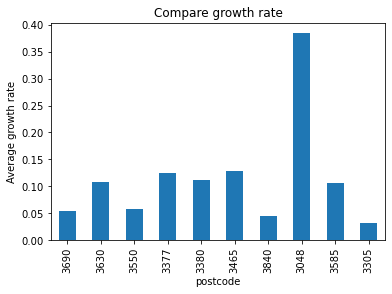

In [50]:
import matplotlib.pyplot as plt

#bar chart for total number of picks VS hour in a day
compare_df['avg_rate'].tail(10).plot.bar()
plt.title('Compare growth rate')
plt.ylabel('Average growth rate')
plt.savefig('../plots/lowest 10 postcode growth rate.png')


In [52]:
compare_df.to_csv('../data/curated/compare growth rate and price.csv')
df.to_csv('../data/curated/3Year_predicted_price.csv')
rate_df.to_csv('../data/curated/growth_rate.csv')

In [16]:
df[df['price'] == df['price'].min()]

,postcode,price,bed,bath,parking,cbd_dist,school_counts,['f']_0,['f']_1,pop23-22,pop24-23,pop25-24,price_2023,price_2024,price_2025
388,3182,50.0,1,1,1.0,4.361,5.0,1,0,151.0,219.0,170.0,364.791619,190.816697,364.351705
1245,3182,50.0,1,1,1.0,4.361,5.0,1,0,151.0,219.0,170.0,364.791619,190.816697,364.351705
2956,3182,50.0,1,1,1.0,4.361,5.0,1,0,151.0,219.0,170.0,364.791619,190.816697,364.351705


In [17]:
df[df['price_2023'] == df['price_2023'].min()]

,postcode,price,bed,bath,parking,cbd_dist,school_counts,['f']_0,['f']_1,pop23-22,pop24-23,pop25-24,price_2023,price_2024,price_2025
606,3305,200.0,1,1,1.0,362.6381,10.0,1,0,-13.0,-21.0,-16.0,167.168782,244.017952,194.77652
1463,3305,200.0,1,1,1.0,362.6381,10.0,1,0,-13.0,-21.0,-16.0,167.168782,244.017952,194.77652
3174,3305,200.0,1,1,1.0,362.6381,10.0,1,0,-13.0,-21.0,-16.0,167.168782,244.017952,194.77652


In [18]:
df[df['price_2024'] == df['price_2024'].min()]

,postcode,price,bed,bath,parking,cbd_dist,school_counts,['f']_0,['f']_1,pop23-22,pop24-23,pop25-24,price_2023,price_2024,price_2025
575,3000,70.0,1,1,1.0,5.2284,4.0,1,0,554.0,542.0,533.0,376.639883,179.91963,394.260736
1432,3000,70.0,1,1,1.0,5.2284,4.0,1,0,554.0,542.0,533.0,376.639883,179.91963,394.260736
3143,3000,70.0,1,1,1.0,5.2284,4.0,1,0,554.0,542.0,533.0,376.639883,179.91963,394.260736


In [19]:
df[df['price_2025'] == df['price_2025'].min()]

,postcode,price,bed,bath,parking,cbd_dist,school_counts,['f']_0,['f']_1,pop23-22,pop24-23,pop25-24,price_2023,price_2024,price_2025
606,3305,200.0,1,1,1.0,362.6381,10.0,1,0,-13.0,-21.0,-16.0,167.168782,244.017952,194.77652
1463,3305,200.0,1,1,1.0,362.6381,10.0,1,0,-13.0,-21.0,-16.0,167.168782,244.017952,194.77652
3174,3305,200.0,1,1,1.0,362.6381,10.0,1,0,-13.0,-21.0,-16.0,167.168782,244.017952,194.77652


In [38]:
df[df['postcode']==3305]

,postcode,price,bed,bath,parking,cbd_dist,school_counts,['f']_0,['f']_1,pop23-22,pop24-23,pop25-24,price_2023,price_2024,price_2025
606,3305,200.0,1,1,1.0,362.6381,10.0,1,0,-13.0,-21.0,-16.0,167.168782,244.017952,194.77652
1463,3305,200.0,1,1,1.0,362.6381,10.0,1,0,-13.0,-21.0,-16.0,167.168782,244.017952,194.77652
3174,3305,200.0,1,1,1.0,362.6381,10.0,1,0,-13.0,-21.0,-16.0,167.168782,244.017952,194.77652
